In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import math as m

In [3]:

pi = tf.constant(m.pi)
f0 = 0
inf_s = np.sqrt(np.finfo(np.float32).eps)
learning_rate = 0.02
training_steps = 2000
batch_size = 100
display_step = 100
x_min = 0
x_max = 1
Num_eval = 20
interval = (x_max-x_min)/(Num_eval-1)
#(x_max-x_min)/Num_eval
# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 128 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons
weights = {
'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
'b1': tf.Variable(tf.random.normal([n_hidden_1])),
'b2': tf.Variable(tf.random.normal([n_hidden_2])),
'out': tf.Variable(tf.random.normal([n_output]))
}
# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.Adam(learning_rate)

In [4]:
# grad
def dwdx(w,x):
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    #first derivative 
    dy = (- w[2:] + 4*w[1:-1] - 3*w[:-2])/(h*h)
    return dy
    
def d2wdx(w,x):
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    #second derivative 
    dy2 = (w[2:] - 2*w[1:-1] + w[:-2])/(h*h)

    return dy2
    
def d4wdx(y,x):
    #spacing between points.
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    
    #fourth derivative 
    dy4 = (y[4:] - 4*y[3:-1] + 6*y[2:-2] - 4*y[1:-3] + y[:-4])/(h*h*h*h)

    return dy4

In [5]:
# Create model
def multilayer_perceptron(x):
  x = np.array([[[x]]],  dtype='float32')
  layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  layer_1 = tf.nn.sigmoid(layer_1)
  layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
  layer_2 = tf.nn.sigmoid(layer_2)
  output = tf.matmul(layer_2, weights['out']) + biases['out']
  return output

# Universal Approximator
def g(x):
  return tf.math.sin(x*pi) * multilayer_perceptron(x) + f0
  #return x*(x-1)* multilayer_perceptron(x) + f0
# Given EDO
def f(x):
  return 100.0
# Custom loss function to approximate the derivatives
def custom_loss():
  summation = []
  w = []
  for x in np.linspace(0,1,Num_eval):
    w.append(g(x))
  start = tf.constant(0.0, dtype = tf.float32)
  end = tf.constant(1.0, dtype = tf.float32)
  x = tf.linspace(start, end, Num_eval)

  w = tf.reshape(w,Num_eval)
  d4 = d4wdx(w,x)
  d2 = d2wdx(w,x)

  ind = -1
  for x in range(Num_eval-4):
    ind += 1
    g_val = d4[ind]
    summation.append((g_val + f(x))**2)

  summation.append((100*(d2[0]-2.46))**2)
  summation.append((100*(d2[Num_eval-3]-2.46))**2)
  return tf.sqrt(tf.reduce_mean(tf.abs(summation)))

In [ ]:
# Test Code
with tf.GradientTape() as tape:
    loss = custom_loss()
trainable_variables=list(weights.values())+list(biases.values())
gradients = tape.gradient(loss, trainable_variables)
print(loss)
print(gradients)

In [7]:
def train_step():
  with tf.GradientTape() as tape:
    loss = custom_loss()
  trainable_variables=list(weights.values())+list(biases.values())
  gradients = tape.gradient(loss, trainable_variables)
  optimizer.apply_gradients(zip(gradients, trainable_variables))
for i in range(training_steps):
  train_step()
  if i % display_step == 0:
    print("loss: %f " % (custom_loss()))

loss: 548.983643 
loss: 18.124886 
loss: 9.654499 
loss: 10.268394 
loss: 4.251417 
loss: 13.129365 
loss: 16.376034 
loss: 5.349580 
loss: 7.773420 
loss: 7.288505 
loss: 5.338913 
loss: 2.957754 
loss: 6.557481 
loss: 5.960804 
loss: 7.892536 
loss: 8.424535 
loss: 6.826389 
loss: 6.447245 
loss: 8.022435 
loss: 7.015622 


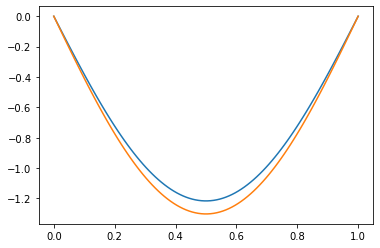

In [9]:
# True Solution (found analitically)
def true_solution(x):
  #return -(50/12)*(x**2)*((1-x)**2)
  return -(50/12)*(x-2*x**3+x**4)
X = np.linspace(0, 1, 100)
result = []
for i in X:
  result.append(g(i).numpy()[0][0][0])
S = true_solution(X)
plt.plot(X, result)
plt.plot(X, S)
plt.show()

In [ ]:
def d4wdx(y,x):
    #spacing between points.
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    
    #fourth derivative 
    dy4 = (y[4:] - 4*y[3:-1] + 6*y[2:-2] - 4*y[1:-3] + y[:-4])/(h*h*h*h)

    return dy4

In [ ]:
def d2wdx(w,x):
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    #second derivative 
    dy2 = (w[2:] - 2*w[1:-1] + w[:-2])/(h*h)

    return dy2
    

In [ ]:
def dwdx(w,x):
    h = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    #first derivative 
    dy = (- w[2:] + 4*w[1:-1] - 3*w[:-2])/(h*h)
    return dy

In [ ]:
summation = []

w = []
w_true = []
for x in np.linspace(0,1,Num_eval):
  w.append(g(x))
  w_true.append(true_solution(x))



start = tf.constant(0.0, dtype = tf.float32)
end = tf.constant(1.0, dtype = tf.float32)
x = tf.linspace(start, end, Num_eval)

w = tf.reshape(w,Num_eval)

w_true = tf.convert_to_tensor(w_true)
w_true = tf.cast(w_true, tf.float32)

temp = d4wdx(w,x)
temp2 = d2wdx(w,x)
temp3 = d4wdx(w_true,x)
temp4 = d2wdx(w_true,x)

print(temp)
print(temp2)
print(temp3)
print(temp4)

tf.Tensor(
[-102.58072  -104.18476  -104.82948  -106.371376 -105.788795 -109.680435
 -106.480125 -108.841515 -107.17922  -109.43186  -106.65102  -106.88405
 -106.04513  -105.01979  -102.89143  -102.79822 ], shape=(16,), dtype=float32)
tf.Tensor(
[ 2.5900238  4.938613   7.0030446  8.778876  10.264278  11.455023
 12.352767  12.946687  13.245519  13.24285   12.943373  12.340674
 11.442586  10.248464   8.760501   6.981581   4.9176226  2.5689044], shape=(18,), dtype=float32)
tf.Tensor(
[ -99.9863   -100.0096    -99.97853  -100.032906  -99.94746  -100.04844
  -99.9863    -99.970764  -99.9863    -99.970764 -100.032906  -99.95522
 -100.032906  -99.9863   -100.01737   -99.97853 ], shape=(16,), dtype=float32)
tf.Tensor(
[ 2.4699895  4.6860538  6.625126   8.287164   9.672209  10.780198
 11.611324  12.165265  12.442279  12.442279  12.165265  11.611324
 10.780198   9.672188   8.287164   6.625126   4.6860538  2.4699895], shape=(18,), dtype=float32)
